In [1]:
if "logger" in globals() and  len(logger.handlers) >= 1:
    # To suppress debug output from the logger defined in .ipython/profile_default/ipython_config.py
    logger.handlers.pop()

%load_ext autoreload
%autoreload 2

%matplotlib inline
logging.getLogger("keyring").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
display(HTML("<style>.output_html { display: block; margin-left: auto; margin-right: auto; }</style>"))

In [3]:
import sys
import numpy
import scipy
from matplotlib import pyplot

if "../src" not in sys.path: sys.path.insert(0, "../src")
from gc_simulation import StarClusterSimulation

if "/supaharris" not in sys.path: sys.path.insert(0, "/supaharris")
from utils import parsec2arcmin, arcmin2parsec

limepy.limepy took 0.04 s
limepy.sample took 8.42 s
convert to AMUSE took 0.01 s
get_radial_profiles took 0.08 s
get_radial_profiles took 0.09 s
get_radial_profiles took 0.06 s
get_radial_profiles took 0.06 s
_project_amuse took 0.03 s


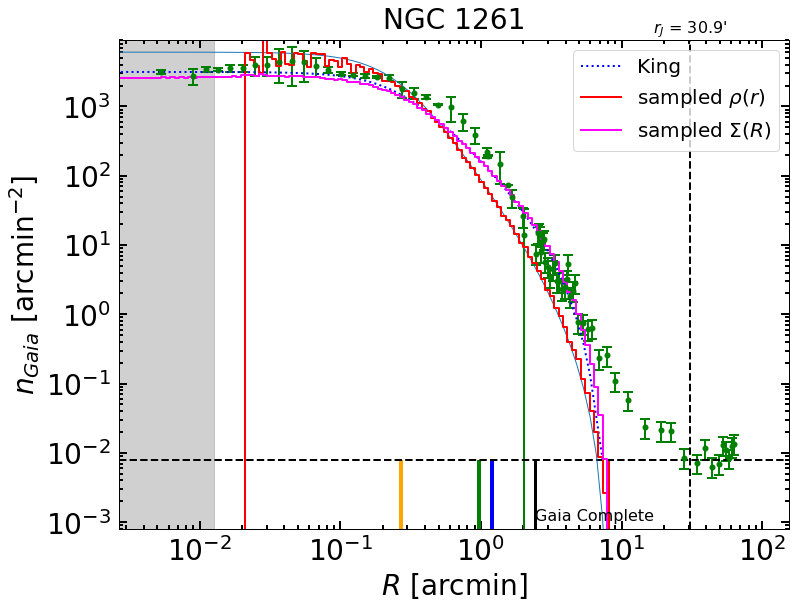

get_radial_profiles took 0.10 s
get_radial_profiles took 0.10 s


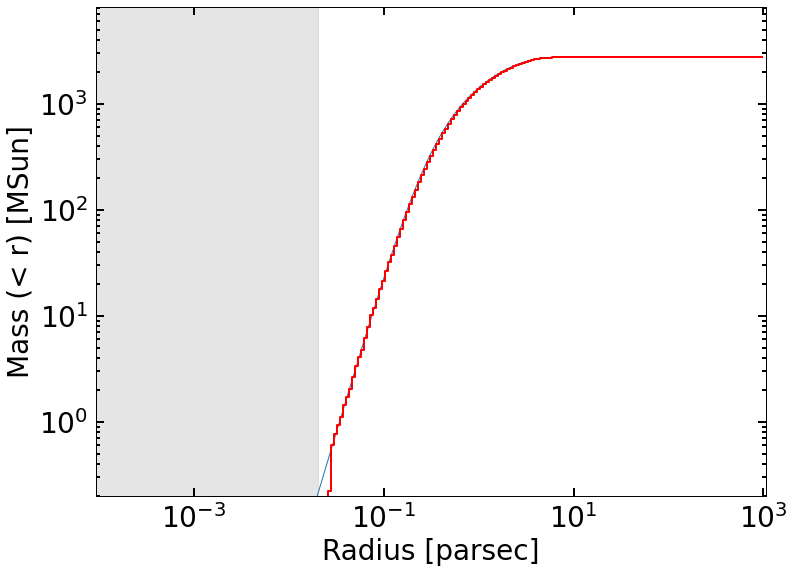

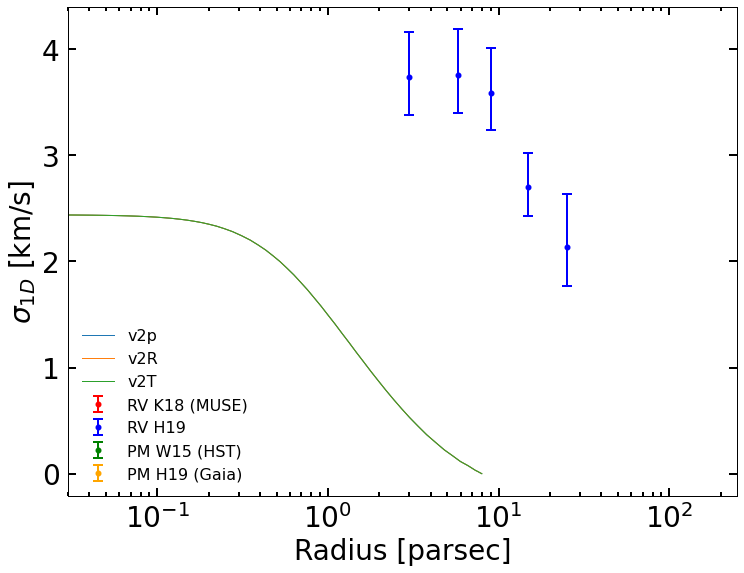

In [4]:
outdir = "../out/"
Nstars = 50000
Nbins = int(numpy.sqrt(Nstars))
for gc_name in ["NGC 1261"]:
    sim = StarClusterSimulation(logger, gc_name)
    
    king_model, king_limepy_sampled, king_amuse_sampled, king_converter = \
        sim.sample_deBoer2019_bestfit_king(Nstars=Nstars, verbose=False)
    
    fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
    sim.add_deBoer2019_to_fig(fig, show_King=True)
    
    sim.add_deBoer2019_sampled_to_ax(ax, king_amuse_sampled, parm="rho",
        model=king_model, rmin=1e-4, rmax=1e3, Nbins=Nbins)
    sim.add_deBoer2019_sampled_to_ax(ax, king_amuse_sampled, parm="Sigma",
        model=king_model, rmin=1e-4, rmax=1e3, Nbins=Nbins)
    
    ax.legend(fontsize=20)
    pyplot.savefig("{0}{1}_sampled.png".format(outdir, gc_name))
    pyplot.show(fig)

    
    # Mass
    fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
    sim.add_deBoer2019_sampled_to_ax(ax, king_amuse_sampled, parm="mc",
        model=king_model, rmin=1e-4, rmax=1e3, Nbins=Nbins)
    pyplot.show(fig)


    # Velocity dispersion
    fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
    # v2, v2r, v2t : total, radial and tangential mean-square velocity
    # ax.plot(sim.king_model.r, sim.king_model.v2, label="v2")
    # ax.plot(sim.king_model.r, sim.king_model.v2r, label="v2r")
    # ax.plot(sim.king_model.r, sim.king_model.v2t, label="v2t")
    # v2R, v2T : radial and tangential component of mean-square velocity on plane of the sky
    ax.plot(king_model.R, king_model.v2p, label="v2p")
    ax.plot(king_model.R, king_model.v2R, label="v2R")
    ax.plot(king_model.R, king_model.v2T, label="v2T")
    # However, according to _project function
    # R is the projected (2d) distance from the center, Sigma is the
    # projected density, v2p is the line-of-sight velocity dispersion,
    # v2R and v2T are the radial and tangential velocity dispersion
    # components projected on the plane of the sky
    # --> What is the difference between the 'mean-square velocity' and 'velocity dispersion'?
    sim.add_H19_RVs_to_fig(fig)
    pyplot.show()